In [1]:
from ase.build import molecule
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Fc(Rij,Rc):
    if Rij<= Rc:
        value = 0.5 * (np.cos(np.pi*(Rij/Rc)) +1)
    if Rij> Rc:
        value = 0
    
    return value

In [3]:
def G2(etta,Rij,Rs):
    value=np.exp(-etta*((Rij-Rs)**2)) 
    return value

In [4]:
def G3(kappa,Rij):
    value = np.cos(kappa * Rij)
    return value

In [5]:
mol = molecule('H2O')

# Distance Matrix(DM)
DM = mol.get_all_distances()

# Number of Atoms from zero (Natom)
Natom = mol.get_global_number_of_atoms()

# Fc Matrix(FCM)
FCM=[]
for atom in range(Natom):
    for number in range(Natom):
        FCM.append(Fc(DM[number][atom],6))
    
# Reshape Fc matrix (NxN)
new_FCM=np.reshape(FCM,(Natom,Natom))



print('number of atom:',Natom)
print('Atom List:',mol.get_chemical_symbols(),'\n')
print('Distance Matix:\n',DM)
print('\n')

print('Fc Matirx','\n',new_FCM)

print('\n')
print('Matrix Shape:',np.shape(new_FCM))


# for atom in range(water.get_global_number_of_atoms()):
#     print(np.sum(new_FCM[atom]))

number of atom: 3
Atom List: ['O', 'H', 'H'] 

Distance Matix:
 [[0.         0.96856502 0.96856502]
 [0.96856502 0.         1.526478  ]
 [0.96856502 1.526478   0.        ]]


Fc Matirx 
 [[1.         0.93706869 0.93706869]
 [0.93706869 1.         0.84861796]
 [0.93706869 0.84861796 1.        ]]


Matrix Shape: (3, 3)


In [6]:
G2M=[]
for atom in range(Natom):
    for number in range(Natom):
        G2M.append((G2(1,DM[atom][number],1)) * new_FCM[atom][number])

    
# G2 Matrix
new_G2M=np.reshape(G2M,(Natom,Natom))

# Zero-Diagonal G2 Matrix
np.fill_diagonal(new_G2M,0)

print(new_G2M)
print('\n')


for atom in range(Natom):
    print(np.sum(new_G2M[atom]))

[[0.         0.93614318 0.93614318]
 [0.93614318 0.         0.64318347]
 [0.93614318 0.64318347 0.        ]]


1.8722863574381783
1.5793266451029369
1.5793266451029369


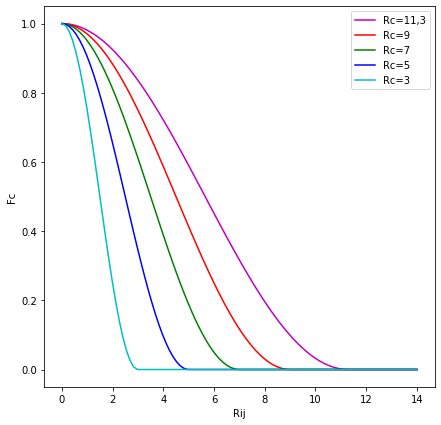

In [7]:
Rij_num = np.linspace(0,14,num=100)

num11 = []
for num in Rij_num:
    num11.append(Fc(num,11.3))
    
num9 = []
for num in Rij_num:
    num9.append(Fc(num,9))
    
num7 = []
for num in Rij_num:
    num7.append(Fc(num,7))
    

num5 = []
for num in Rij_num:
    num5.append(Fc(num,5))
    
num3 = []
for num in Rij_num:
    num3.append(Fc(num,3))
    
    
plt.figure(figsize=(7,7))
plt.plot(Rij_num, num11,'m',label='Rc=11,3')
plt.plot(Rij_num, num9, 'r',label='Rc=9',)
plt.plot(Rij_num, num7, 'g',label='Rc=7',)
plt.plot(Rij_num, num5, 'b',label='Rc=5',)
plt.plot(Rij_num, num3, 'c', label='Rc=3',)

plt.legend(loc='best')
plt.xlabel('Rij')
plt.ylabel('Fc')
plt.show()

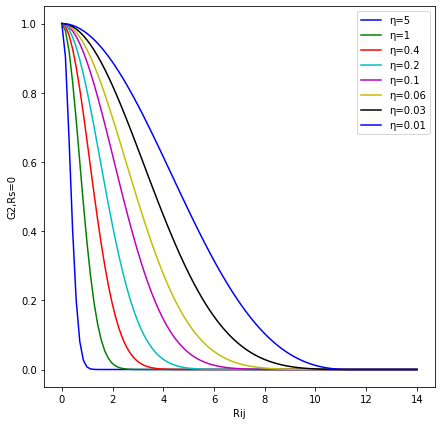

In [8]:
Rij_num = np.linspace(0,14,num=100)

G2e_5 = []
for num in Rij_num:
    G2e_5.append(G2(5,num,0) * Fc(num,11.3))
    
G2e_1 = []
for num in Rij_num:
    G2e_1.append(G2(1,num,0) * Fc(num,11.3))
    
G2e_04 = []
for num in Rij_num:
    G2e_04.append(G2(4e-1,num,0) * Fc(num,11.3))
    
G2e_02 = []
for num in Rij_num:
    G2e_02.append(G2(2e-1,num,0) * Fc(num,11.3))
    
G2e_01 = []
for num in Rij_num:
    G2e_01.append(G2(1e-1,num,0) * Fc(num,11.3))
    
G2e_006 = []
for num in Rij_num:
    G2e_006.append(G2(6e-2,num,0) * Fc(num,11.3))
    
G2e_003 = []
for num in Rij_num:
    G2e_003.append(G2(3e-2,num,0) * Fc(num,11.3))
    
G2e_001 = []
for num in Rij_num:
    G2e_001.append(G2(1e-2,num,0) * Fc(num,11.3))
    

plt.figure(figsize=(7,7))
plt.plot(Rij_num, G2e_5,  'b', label='\u03B7=5')
plt.plot(Rij_num, G2e_1,  'g', label='\u03B7=1')
plt.plot(Rij_num, G2e_04, 'r', label='\u03B7=0.4')
plt.plot(Rij_num, G2e_02, 'c', label='\u03B7=0.2')
plt.plot(Rij_num, G2e_01, 'm', label='\u03B7=0.1')
plt.plot(Rij_num, G2e_006, 'y', label='\u03B7=0.06')
plt.plot(Rij_num, G2e_003, 'k', label='\u03B7=0.03')
plt.plot(Rij_num, G2e_001, 'b', label='\u03B7=0.01')

plt.legend(loc='best')
plt.xlabel('Rij')
plt.ylabel('G2,Rs=0')
plt.show()

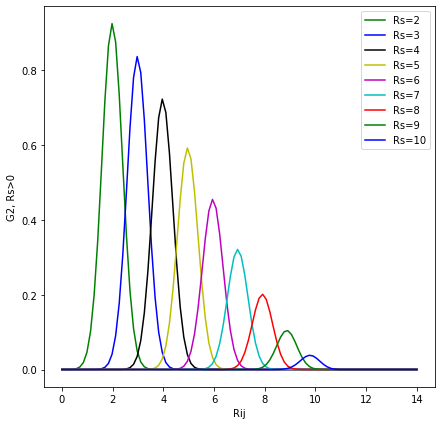

In [9]:
Rij_num = np.linspace(0,14,num=100)

G2_10 = []
for num in Rij_num:
    G2_10.append(G2(3,num,10) * Fc(num,11.3))
    
G2_9 = []
for num in Rij_num:
    G2_9.append(G2(3,num,9) * Fc(num,11.3))
    
G2_8 = []
for num in Rij_num:
    G2_8.append(G2(3,num,8) * Fc(num,11.3))
    
G2_7 = []
for num in Rij_num:
    G2_7.append(G2(3,num,7) * Fc(num,11.3))
    
G2_6 = []
for num in Rij_num:
    G2_6.append(G2(3,num,6) * Fc(num,11.3))
    
G2_5 = []
for num in Rij_num:
    G2_5.append(G2(3,num,5) * Fc(num,11.3))
    
G2_4 = []
for num in Rij_num:
    G2_4.append(G2(3,num,4) * Fc(num,11.3))
    
G2_3 = []
for num in Rij_num:
    G2_3.append(G2(3,num,3) * Fc(num,11.3))
    
G2_2 = []
for num in Rij_num:
    G2_2.append(G2(3,num,2) * Fc(num,11.3))
    
    
plt.figure(figsize=(7,7))
plt.plot(Rij_num, G2_2, 'g', label='Rs=2')
plt.plot(Rij_num, G2_3, 'b', label='Rs=3')
plt.plot(Rij_num, G2_4, 'k', label='Rs=4')
plt.plot(Rij_num, G2_5, 'y', label='Rs=5')
plt.plot(Rij_num, G2_6, 'm', label='Rs=6')
plt.plot(Rij_num, G2_7, 'c', label='Rs=7')
plt.plot(Rij_num, G2_8, 'r', label='Rs=8')
plt.plot(Rij_num, G2_9, 'g', label='Rs=9')
plt.plot(Rij_num, G2_10,'b', label='Rs=10')

plt.legend(loc='best')
plt.xlabel('Rij')
plt.ylabel('G2, Rs>0')
plt.show()

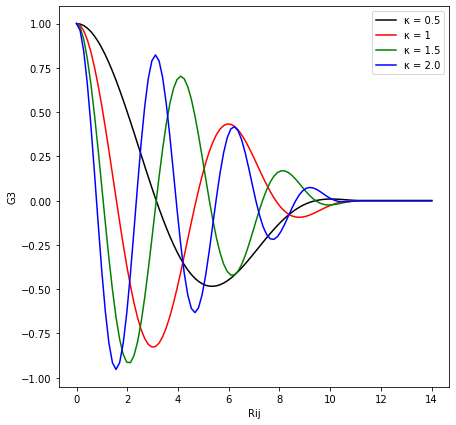

In [10]:
Rij_num = np.linspace(0,14,num=100)

G3_05 = []
for num in Rij_num:
    G3_05.append(G3(0.5,num) * Fc(num,11.3))
    
G3_1 = []
for num in Rij_num:
    G3_1.append(G3(1,num) * Fc(num,11.3))
    
G3_15 = []
for num in Rij_num:
    G3_15.append(G3(1.5,num) * Fc(num,11.3))
    
G3_20 = []
for num in Rij_num:
    G3_20.append(G3(2,num) * Fc(num,11.3))
    
    
plt.figure(figsize=(7,7))
plt.plot(Rij_num, G3_05, 'k', label='\u03BA = 0.5')
plt.plot(Rij_num, G3_1,  'r', label='\u03BA = 1')
plt.plot(Rij_num, G3_15, 'g', label='\u03BA = 1.5')
plt.plot(Rij_num, G3_20, 'b', label='\u03BA = 2.0')



plt.legend(loc='best')
plt.xlabel('Rij')
plt.ylabel('G3')
plt.show()